# Loan Application Status Prediction

### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Dataset
df=pd.read_csv(r"loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking for null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

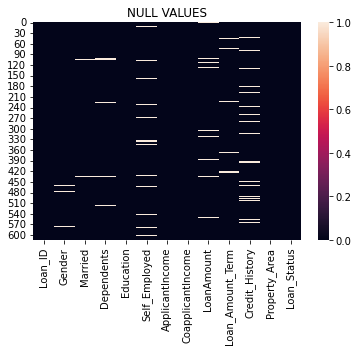

In [7]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

We can see null values present in Gender, Married, Dependents, Self_Employed,LoanAmount, Loan_Amount_Term & Credit_History.

## Checking for the Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that most of the datatypes are object datatypes and a few integer & float datatypes.

### Treating the Null values
Since Gender, Married, Dependents, Self_Employed,Loan_Amount_Term & Credit_History are categorical columns,we shall replace the null values in these columns with the modeof the respective columns.

In [9]:
# Modes of categorical columns
print("The mode of Gender is:",df["Gender"].mode())
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64


In [10]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

Since LoanAmount column is a numerical column we shall replace the null values with median of this column.

In [12]:
# Median of numerical column
print("The median of LoanAmount is:",df["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [13]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

## Checking null values

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

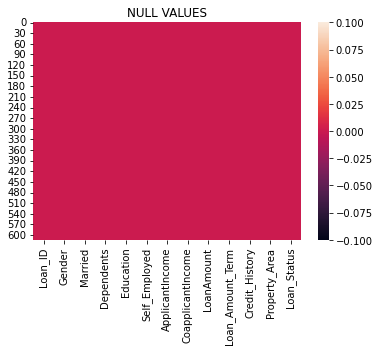

In [15]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

so now there are no null value

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
# Mean of our target variable 'attrition'
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


In [19]:
# Value counts of each column.
for i in df.columns:
        print(df[i].value_counts())
        print('-----------------------------------------------------')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------------------------------------------
Male      502
Female    112
Name: Gender, dtype: int64
-----------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
-----------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
--------------------

The column Loan_ID is the unique ID given to the applicants also it has no significane in the prediction so we shall drop this column.

In [20]:
# Removing unwanted column
df.drop("Loan_ID",axis=1,inplace=True)

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
# Unique values
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [23]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [24]:
#Checking for any empty observation in target column
df.loc[df['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No empty observations.

## UniVariate Analysis

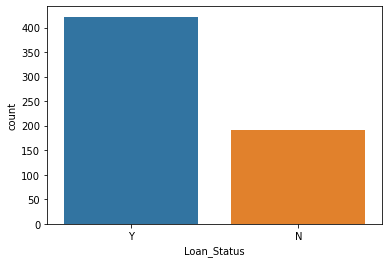

In [25]:
sns.countplot(df['Loan_Status'])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

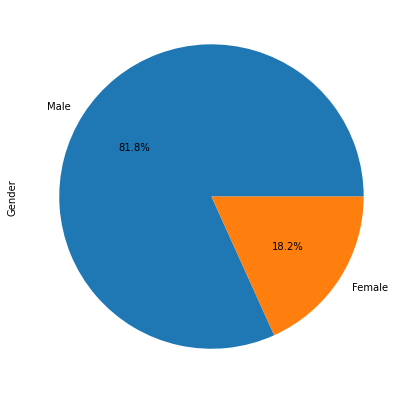

In [28]:
plt.figure(figsize=(10,7))
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Yes    401
No     213
Name: Married, dtype: int64


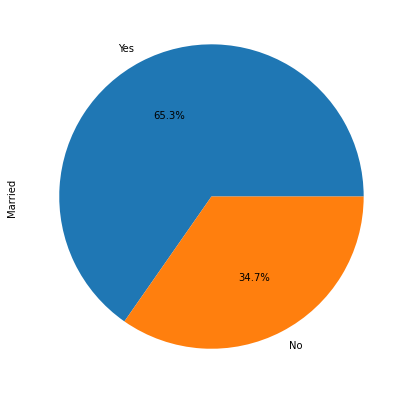

In [29]:
plt.figure(figsize=(10,7))
print(df['Married'].value_counts())
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

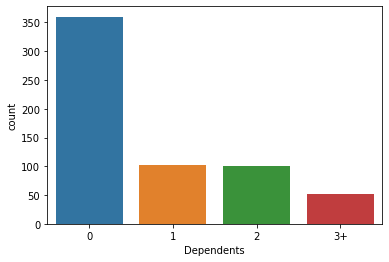

In [30]:
sns.countplot(df['Dependents'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


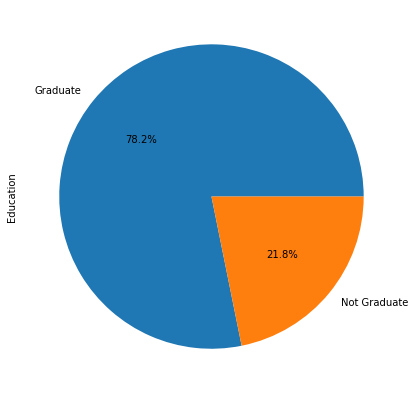

In [31]:
plt.figure(figsize=(10,7))
print(df['Education'].value_counts())
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


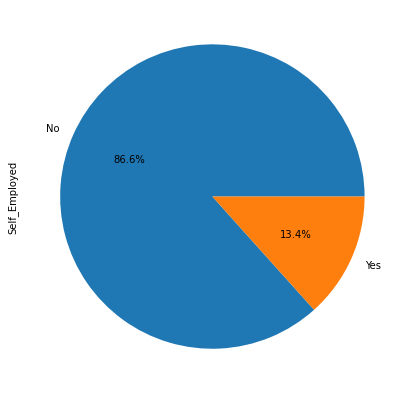

In [32]:
plt.figure(figsize=(10,7))
print(df['Self_Employed'].value_counts())
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

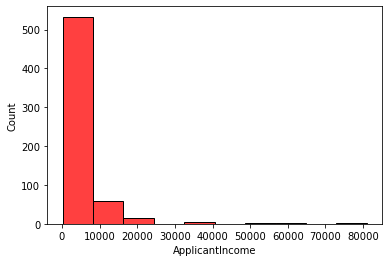

In [33]:
sns.histplot(data=df,x="ApplicantIncome",bins=10,color='r')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

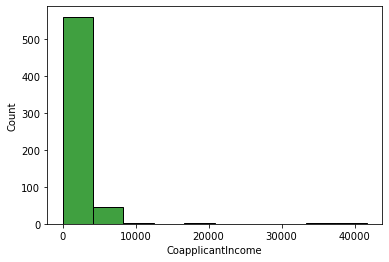

In [34]:
sns.histplot(data=df,x="CoapplicantIncome",bins=10,color='g')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

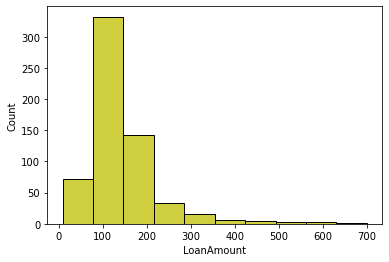

In [35]:
sns.histplot(data=df,x="LoanAmount",bins=10,color='y')

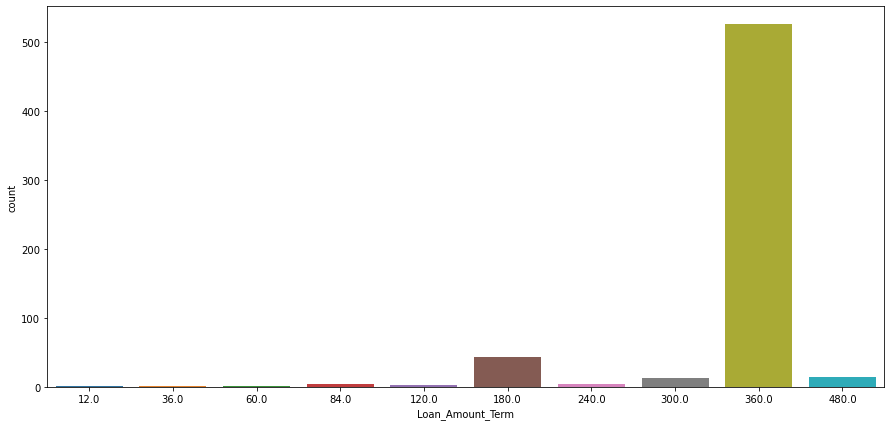

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(df['Loan_Amount_Term'])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


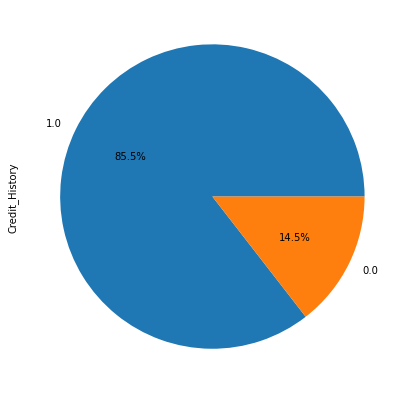

In [37]:
plt.figure(figsize=(10,7))
print(df['Credit_History'].value_counts())
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


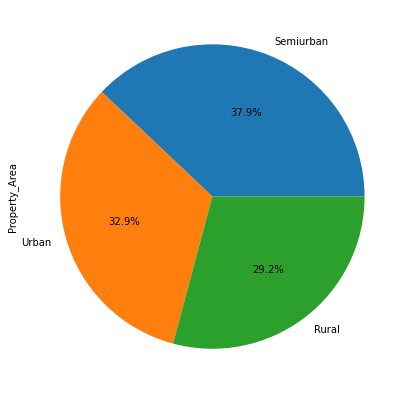

In [38]:
plt.figure(figsize=(10,7))
print(df['Property_Area'].value_counts())
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

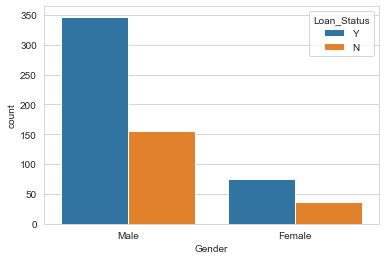

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=df)

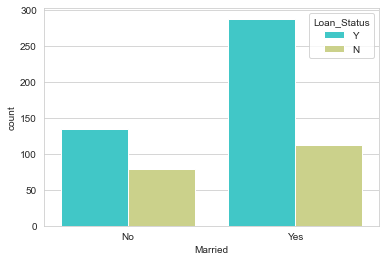

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='rainbow')
plt.show()

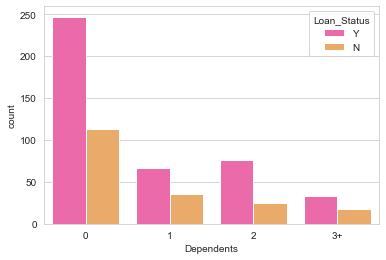

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=df,palette='spring')
plt.show()

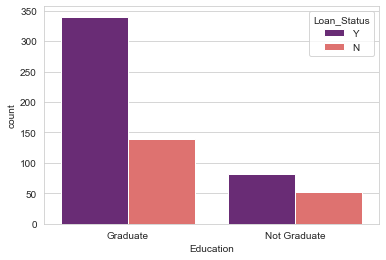

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='magma')
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

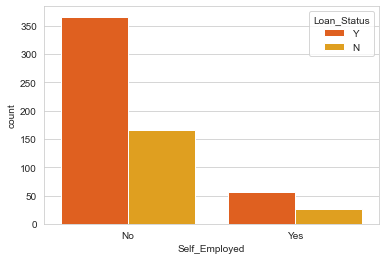

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='autumn')

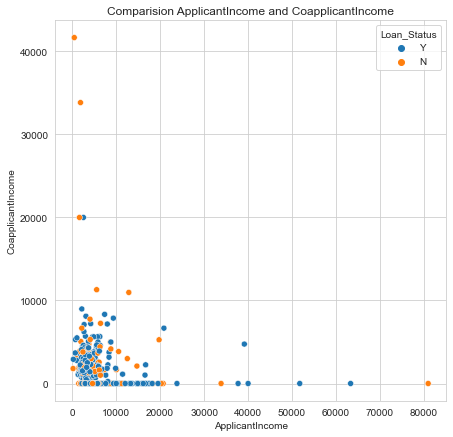

In [46]:
plt.figure(figsize=[7,7])
plt.title('Comparision ApplicantIncome and CoapplicantIncome')
sns.scatterplot(df['ApplicantIncome'],df['CoapplicantIncome'],hue=df["Loan_Status"])
plt.show()

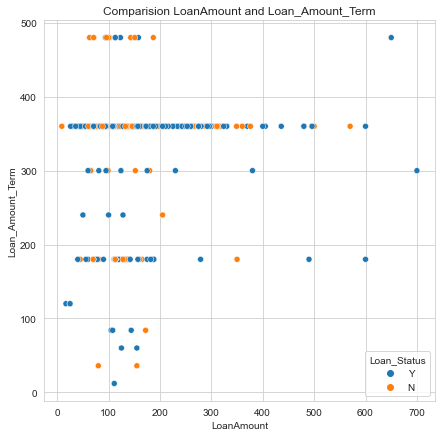

In [47]:
plt.figure(figsize=[7,7])
plt.title('Comparision LoanAmount and Loan_Amount_Term')
sns.scatterplot(df['LoanAmount'],df['Loan_Amount_Term'],hue=df["Loan_Status"])
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

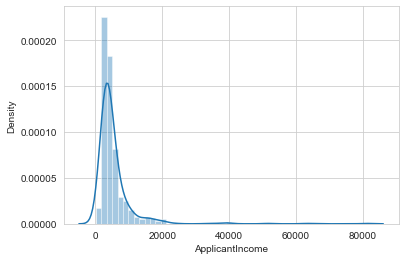

In [48]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

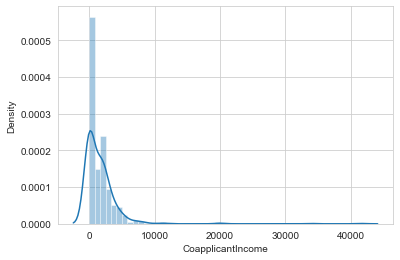

In [49]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

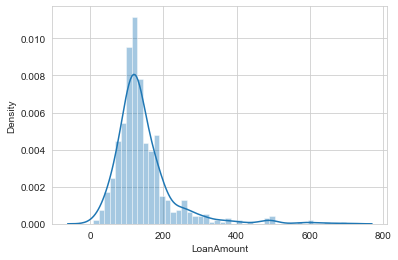

In [50]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

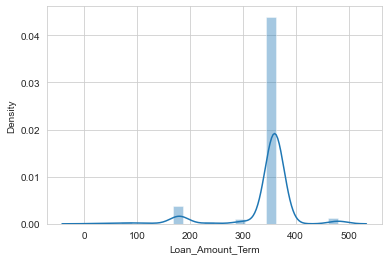

In [51]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

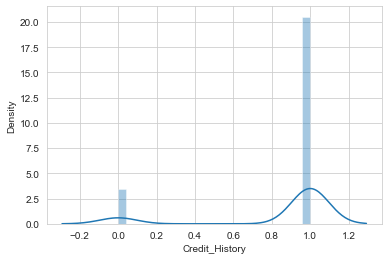

In [52]:
sns.distplot(df['Credit_History'])

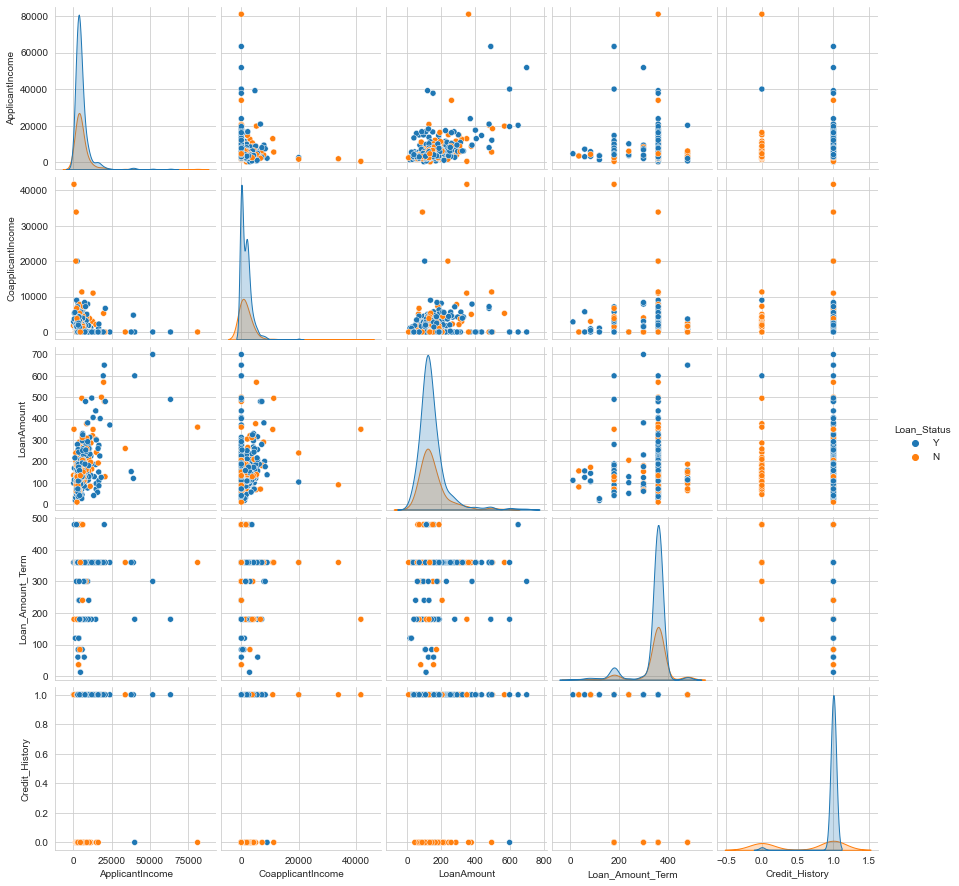

In [53]:
sns.pairplot(df,hue="Loan_Status")

## Encoding the Data Frame

We shall use Label Encoder to encode the data for model building.

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## Checking Outliers

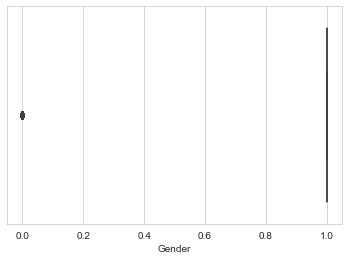

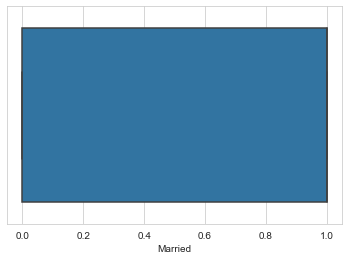

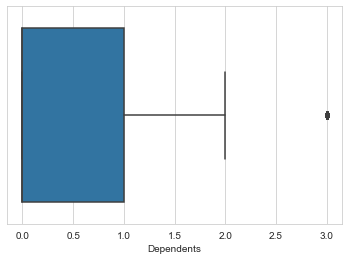

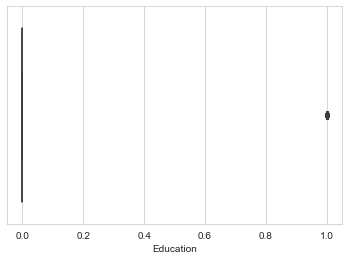

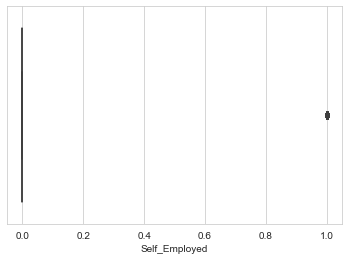

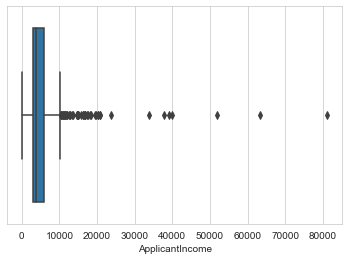

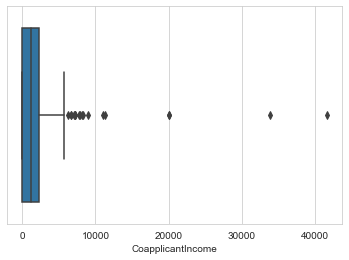

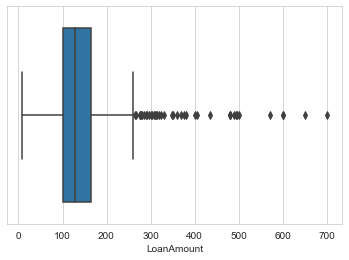

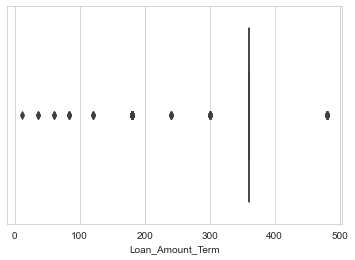

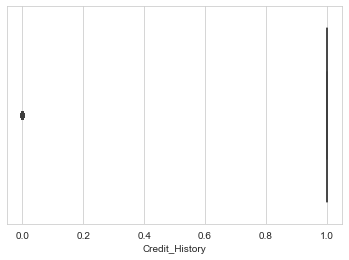

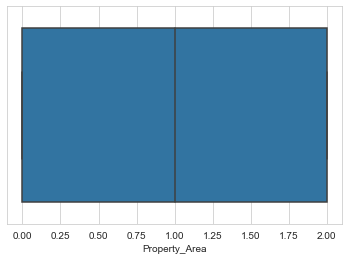

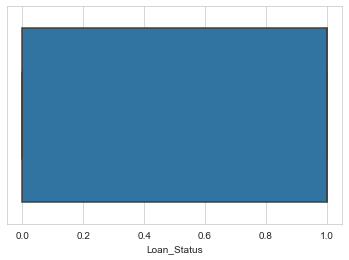

In [57]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

We can see outliers present in Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term & Credit_History.

## Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [58]:
df_outliers=df[["Gender", "Dependents", "Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

In [59]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
new_df=df[(z<3).all(axis=1)]
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [60]:
new_df.shape

(577, 12)

In [61]:
df.shape

(614, 12)

In [62]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

The data loss after z-score is 6.02 %.

## Checking Skewness

In [63]:
new_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We see high levels of skewness in most of the columns.

In [64]:
df_skew=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

### We shall use Power Transformer to remove skewness.

In [65]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [66]:
new_df[df_skew] = scal.fit_transform(new_df[df_skew].values)
new_df[df_skew].skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

In [67]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,2,1
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,0,0
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,2,1
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,2,1
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,0,1
610,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,0,1
611,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,2,1
612,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,2,1


Skewness is removed.

## Correlation

In [68]:
new_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.183471,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.098370,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.349618,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.128399,0.019308,0.010595,0.089026
Dependents,0.183471,0.349618,1.000000,0.059728,0.069648,0.108178,0.023606,0.135297,-0.095181,-0.015924,0.040716,0.018517
Education,0.045696,0.024817,0.059728,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.062494,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.069648,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.052033,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.108178,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.089402,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.023606,0.049739,-0.087338,-0.360946,1.000000,0.200081,-0.000281,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.135297,-0.128715,0.117218,0.432154,0.200081,1.000000,0.021702,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.098370,-0.128399,-0.095181,-0.062494,-0.052033,-0.089402,-0.000281,0.021702,1.000000,-0.000146,-0.029931,-0.056610
Credit_History,0.013172,0.019308,-0.015924,-0.075217,-0.016390,0.028825,0.006564,-0.003626,-0.000146,1.000000,-0.008121,0.560936


In [69]:
new_df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.018517
Gender               0.017408
ApplicantIncome     -0.002484
LoanAmount          -0.023609
Self_Employed       -0.026525
Loan_Amount_Term    -0.056610
Education           -0.092658
Name: Loan_Status, dtype: float64

<AxesSubplot:>

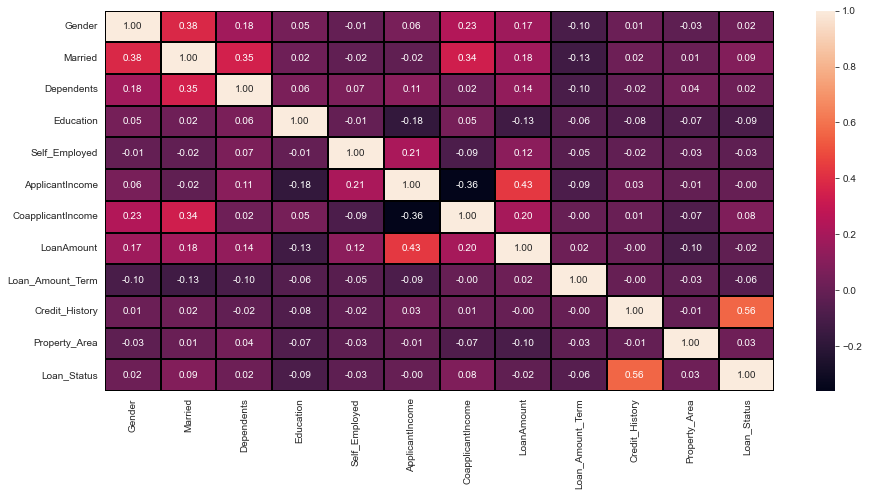

In [70]:
# Visualizing df_new_la.corr() using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(new_df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation heatmap, we see that Credit_History is highly positively correlated with our target variable Loan_Status. Also there is high positive correlation between LoanAmount & ApplicantIncome,Gender & Married, and Dependents & Married.

There is very less correlation between ApplicantIncome,LoanAmount,Loan_Amount_Term,Dependents & Gender with our target variable Loan_Status.

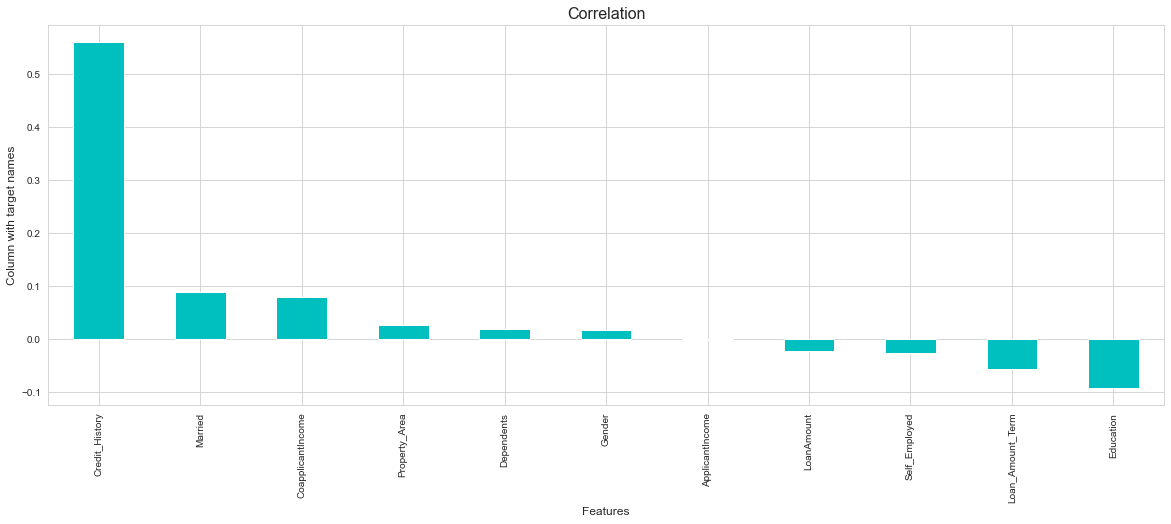

In [71]:
plt.figure(figsize=(20,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()


## Model Building

In [72]:
x = new_df.drop("Loan_Status",axis=1)
y = new_df["Loan_Status"]

In [73]:
x.shape

(577, 11)

In [74]:
y.shape

(577,)

# VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Gender,1.218854
1,Married,1.431827
2,Dependents,1.183025
3,Education,1.060268
4,Self_Employed,1.055256
5,ApplicantIncome,1.763362
6,CoapplicantIncome,1.579512
7,LoanAmount,1.543185
8,Loan_Amount_Term,1.047798
9,Credit_History,1.008568


The Multi-collinearaity of all columns is good.

## Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.227472
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.306522
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.227472
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.227472
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,-1.306522
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,-1.306522
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,1.227472
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,1.227472


## SMOTE

In [77]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [79]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

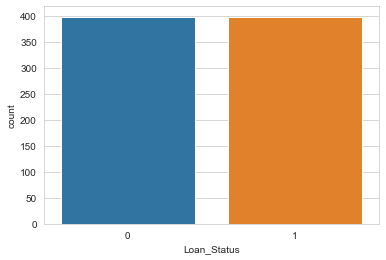

In [80]:
# Visualizing the data after oversampling
sns.countplot(y)

We have balanced the data using SMOTE.

### Best Random State

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [84]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.22, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.8068181818181818  on Random State : 4


In [85]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.22, random_state=maxRS)

In [86]:
x_train.shape

(620, 11)

In [87]:
y_train.shape

(620,)

In [88]:
x_test.shape

(176, 11)

In [89]:
y_test.shape

(176,)

In [90]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [92]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.7840909090909091
[[56 35]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75        91
           1       0.70      0.96      0.81        85

    accuracy                           0.78       176
   macro avg       0.83      0.79      0.78       176
weighted avg       0.83      0.78      0.78       176



## Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.7159090909090909
[[75 16]
 [34 51]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        91
           1       0.76      0.60      0.67        85

    accuracy                           0.72       176
   macro avg       0.72      0.71      0.71       176
weighted avg       0.72      0.72      0.71       176



## KNearest Neighbors Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.7784090909090909
[[76 15]
 [24 61]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        91
           1       0.80      0.72      0.76        85

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



## Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8295454545454546
[[84  7]
 [23 62]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        91
           1       0.90      0.73      0.81        85

    accuracy                           0.83       176
   macro avg       0.84      0.83      0.83       176
weighted avg       0.84      0.83      0.83       176



## Support Vector Machine

In [99]:
from sklearn.svm import SVC

In [100]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8238636363636364
[[69 22]
 [ 9 76]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        91
           1       0.78      0.89      0.83        85

    accuracy                           0.82       176
   macro avg       0.83      0.83      0.82       176
weighted avg       0.83      0.82      0.82       176



## Gradient Boosting Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.6761363636363636
[[73 18]
 [39 46]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        91
           1       0.72      0.54      0.62        85

    accuracy                           0.68       176
   macro avg       0.69      0.67      0.67       176
weighted avg       0.68      0.68      0.67       176



## XGB Classifier

In [103]:
from xgboost import XGBClassifier

In [104]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

accuracy score:  0.7272727272727273
[[83  8]
 [40 45]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.78        91
           1       0.85      0.53      0.65        85

    accuracy                           0.73       176
   macro avg       0.76      0.72      0.71       176
weighted avg       0.76      0.73      0.72       176



From the above models, the highest accuracy score was achieved by Random Forest Classifier,followed by SVC and Linear Regression.

## Cross Validation Score

In [105]:
from sklearn.model_selection import cross_val_score

In [111]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7224056603773585


In [110]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7902672955974843


In [114]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7399921383647798


In [116]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8317767295597485


In [117]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.7475314465408806


In [118]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.7903223270440252


In [119]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.7991037735849057


Among the cross validation scores the highest score belongs to Random Forest Classifier, followed by XGB Classifier & Gradient Boosting Classifier.

## Hyper Parameter Tuning

Since the accuracy Score and the cross validation score of Random Forest Classifier model are the high, we shall consider this model for hyper parameter tuning.

We shall use GridSearchCV for Hyper Parameter Tuning.

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters, scoring = 'accuracy', cv = 7)

In [122]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [123]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 300}

In [151]:
rfc1=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=4, max_features='sqrt',max_samples=0.1)

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.8011363636363636
[[62 29]
 [ 6 79]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78        91
           1       0.73      0.93      0.82        85

    accuracy                           0.80       176
   macro avg       0.82      0.81      0.80       176
weighted avg       0.82      0.80      0.80       176



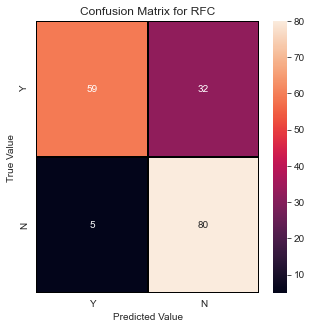

In [149]:
cm = confusion_matrix(y_test, pred_rf1)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RFC')
plt.show()

## ROC-AUC Curve

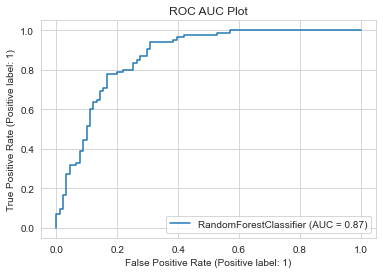

In [150]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the ROC-AUC plot we get the AUC score to be 87 %.

## Saving the Model

In [152]:
import joblib
joblib.dump(rfc1,"Loan_Appln_Status_Predn.pkl")

['Loan_Appln_Status_Predn.pkl']

## Prediction

In [154]:
# Loading the saved model
model=joblib.load("Loan_Appln_Status_Predn.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [155]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
Predicted Value,1,0,1,1,1,1,0,1,1,1,...,0,1,1,1,1,0,1,1,1,1
Actual Value,1,0,1,1,0,1,0,1,1,1,...,0,0,0,1,1,0,1,1,1,0


#### Completed.